In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import median
from scipy.stats import norm

import os
os.environ['JAVA_HOME'] = '/Library/Java/JavaVirtualMachines/jdk-15.0.1.jdk/Contents/Home'

from pyspark import SparkContext
from pyspark.sql import *
from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.ml.feature import StringIndexer

In [6]:
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [7]:
schema_ratings = StructType([
    StructField("item_id", StringType(), False),
    StructField("user_id", StringType(), False),
    StructField("rating", DoubleType(), False),
    StructField("timestamp", IntegerType(), False)])

In [8]:
ratings = spark.read.csv("../Data/Appliances.csv", header=False, schema=schema_ratings).drop('timestamp')

In [9]:
ratings.show()

+----------+--------------+------+
|   item_id|       user_id|rating|
+----------+--------------+------+
|1118461304|A3NHUQ33CFH3VM|   5.0|
|1118461304|A3SK6VNBQDNBJE|   5.0|
|1118461304|A3SOFHUR27FO3K|   5.0|
|1118461304|A1HOG1PYCAE157|   5.0|
|1118461304|A26JGAM6GZMM4V|   5.0|
|1118461304|A17K8WANMYHTX2|   5.0|
|1118461304|A13IW3A6W43U0G|   5.0|
|1118461304|A1ECEGG1MP7J8J|   5.0|
|1118461304|A2D5X9G9S3A7RN|   5.0|
|1118461304| AP2F86JFRQ205|   5.0|
|1118461304|A3VF3A5A3O04E1|   4.0|
|1118461304|A14DW5UMQ1M96O|   5.0|
|1118461304|A2V7UVKOFG57IW|   4.0|
|1118461304|A2BM5NTLX7CES1|   4.0|
|1118461304|A1EQ5D5JRSW23K|   5.0|
|1118461304|A1R2JUOGIYH6HO|   4.0|
|1118461304|A3JRW716H3AX14|   5.0|
|1118461304|A3KGLXW3EYDTUH|   4.0|
|1118461304|A1B70ZEWQ6UH1A|   3.0|
|1118461304|A2I5QME4S7CLFI|   5.0|
+----------+--------------+------+
only showing top 20 rows



In [10]:
rating_list = [row.rating for row in ratings.select('rating').collect()]

In [11]:
avg_rating = np.mean(rating_list)
print("Average Appliance Rating = {}".format(avg_rating))

Average Appliance Rating = 4.2742092017445925


In [12]:
median_rating = median(rating_list)
print("Median Appliance Rating = {}".format(median_rating))

Median Appliance Rating = 5.0


In [13]:
user_indexer = StringIndexer(inputCol='user_id', outputCol='user_int_id')
ratings = user_indexer.fit(ratings).transform(ratings)

In [14]:
item_indexer = StringIndexer(inputCol='item_id', outputCol='item_int_id')
ratings = item_indexer.fit(ratings).transform(ratings)

In [15]:
ratings = ratings.withColumn('rating', ratings.rating.cast('int'))
ratings = ratings.withColumn('user_int_id', ratings.user_int_id.cast('int'))
ratings = ratings.withColumn('item_int_id', ratings.item_int_id.cast('int'))

In [16]:
ratings.show()

+----------+--------------+------+-----------+-----------+
|   item_id|       user_id|rating|user_int_id|item_int_id|
+----------+--------------+------+-----------+-----------+
|1118461304|A3NHUQ33CFH3VM|     5|        118|       2229|
|1118461304|A3SK6VNBQDNBJE|     5|     396610|       2229|
|1118461304|A3SOFHUR27FO3K|     5|     397010|       2229|
|1118461304|A1HOG1PYCAE157|     5|     122436|       2229|
|1118461304|A26JGAM6GZMM4V|     5|     204413|       2229|
|1118461304|A17K8WANMYHTX2|     5|      88869|       2229|
|1118461304|A13IW3A6W43U0G|     5|      75566|       2229|
|1118461304|A1ECEGG1MP7J8J|     5|     111423|       2229|
|1118461304|A2D5X9G9S3A7RN|     5|     226519|       2229|
|1118461304| AP2F86JFRQ205|     5|     479108|       2229|
|1118461304|A3VF3A5A3O04E1|     4|     406281|       2229|
|1118461304|A14DW5UMQ1M96O|     5|      78358|       2229|
|1118461304|A2V7UVKOFG57IW|     4|     286083|       2229|
|1118461304|A2BM5NTLX7CES1|     4|     221364|       222

In [17]:
ratings = ratings.orderBy(F.rand())

In [18]:
ratings.show()

+----------+--------------+------+-----------+-----------+
|   item_id|       user_id|rating|user_int_id|item_int_id|
+----------+--------------+------+-----------+-----------+
|B00569NRI2|A3MBQQ30FJ9E3M|     5|      48382|        567|
|B003GF33ZU| ASJC38NOYFMQC|     5|      60888|        646|
|B0128NYWGE|A2VU5I821CYQJV|     3|     288122|       2628|
|B000P9BY2E|A3UWDHSDAVMNNY|     5|     404511|        520|
|B00W0XE60U| AIHJ4OGKQ59RB|     5|      57216|         62|
|B001TJ5380|A39UUXTEW7XGI5|     5|     334935|        122|
|B01BLLM4X2|A1QGHX4ZFCMMO4|     5|     151496|        706|
|B0053Y34GK|A31B4UFW4541FP|     5|     306338|        390|
|B001KGX5G4| A4L4XNIVTA465|     5|     411033|        278|
|B004XLDNZQ|A3HDIRY68CQQF5|     5|     359750|       1045|
|B0053F80JA| ARGMJO2IKR6GV|     5|     487174|         29|
|B0121CFQ4E|A2BIW4VA6RZUGC|     5|      31084|        497|
|B0049POOKE|A12F1134XZ5V1Q|     5|       4262|        393|
|B00AB51CUG| AJERMSONPROG5|     1|     460364|        53

In [21]:
ratings.write.save('../Data/appliances.parquet')

In [22]:
ratings.count()

602777

In [27]:
train, test, val = ratings.randomSplit([0.7, 0.2, 0.1])

In [28]:
train.show()

+----------+--------------+------+-----------+-----------+
|   item_id|       user_id|rating|user_int_id|item_int_id|
+----------+--------------+------+-----------+-----------+
|1118461304|A13IW3A6W43U0G|     5|      75566|       2229|
|1118461304|A14DW5UMQ1M96O|     5|      78358|       2229|
|1118461304|A17K8WANMYHTX2|     5|      88869|       2229|
|1118461304|A1EQ5D5JRSW23K|     5|      18788|       2229|
|1118461304|A1F1A0QQP2XVH5|     5|       5116|       2229|
|1118461304|A1H6JP5UC5WVT7|     4|     120805|       2229|
|1118461304|A1INE33UQ1B4Q3|     5|     125632|       2229|
|1118461304|A1R2JUOGIYH6HO|     4|     153501|       2229|
|1118461304|A26JGAM6GZMM4V|     5|     204413|       2229|
|1118461304|A2BM5NTLX7CES1|     4|     221364|       2229|
|1118461304|A2D5X9G9S3A7RN|     5|     226519|       2229|
|1118461304|A2I5QME4S7CLFI|     5|     243117|       2229|
|1118461304|A2QKCOX5ACRHC5|     3|     270827|       2229|
|1118461304|A2RQ0AT4XZUIXL|     3|     274766|       222

In [29]:
test.show()

+----------+--------------+------+-----------+-----------+
|   item_id|       user_id|rating|user_int_id|item_int_id|
+----------+--------------+------+-----------+-----------+
|1118461304|A1ECEGG1MP7J8J|     5|     111423|       2229|
|1118461304|A1HOG1PYCAE157|     5|     122436|       2229|
|1118461304|A3MWXF2CLXHBRI|     5|     377860|       2229|
|1118461304|A3NHUQ33CFH3VM|     5|        118|       2229|
|1118461304| ASHO96ZB8AL1Z|     5|      60864|       2229|
|B00004SQHD|A1F8KMYRU1WEF2|     5|      18993|       2942|
|B00004SQHD|A25RLL7WVGMH9B|     5|     201781|       2942|
|B00004SQHD|A2Y7GJMFR0886X|     3|     295963|       2942|
|B00004SQHD|A3CJX4WBAVRK01|     5|     343724|       2942|
|B00004SQHD| AWHWKFAVSH827|     5|     503875|       2942|
|B00004YWK2|A160Y8BJWHYOER|     5|      83703|        404|
|B00004YWK2|A16RQOWNVD8JI7|     4|      86196|        404|
|B00004YWK2|A17IU11U0ZX1KA|     3|      88742|        404|
|B00004YWK2|A17ODKZV8TK69X|     4|      16203|        40

In [30]:
val.show()

+----------+--------------+------+-----------+-----------+
|   item_id|       user_id|rating|user_int_id|item_int_id|
+----------+--------------+------+-----------+-----------+
|1118461304|A1B70ZEWQ6UH1A|     3|     101029|       2229|
|1118461304|A1DGVGJ55SB5PV|     5|     108548|       2229|
|1118461304|A3JRW716H3AX14|     5|     367548|       2229|
|1118461304| ABEAUXVVB2E1M|     4|     433745|       2229|
|B00004YWK2|A10FT9CYOHPU7E|     2|      65351|        404|
|B00004YWK2|A15GIKJZMKRBSY|     4|      81822|        404|
|B00004YWK2|A1AMCUUMMJ76SJ|     4|      99117|        404|
|B00004YWK2|A1ISAGPQ7AIBY1|     5|       5397|        404|
|B00004YWK2| A1VEX8UG96ZW8|     1|     167843|        404|
|B00004YWK2|A1WUSY40L8N9SK|     5|     172589|        404|
|B00004YWK2|A2AAJMKGGCWEOT|     5|     216882|        404|
|B00004YWK2| A2M7PPYXV7AKD|     5|       1104|        404|
|B00004YWK2|A3028R8VERNDHI|     1|      40163|        404|
|B00004YWK2|A31I9GY8AQK988|     3|     306972|        40

In [31]:
train.write.save('../Data/appliances_train.parquet')
test.write.save('../Data/appliances_test.parquet')
val.write.save('../Data/appliances_val.parquet')

In [32]:
stats = ratings.describe()
stats.show()

+-------+--------------------+--------------------+------------------+------------------+-----------------+
|summary|             item_id|             user_id|            rating|       user_int_id|      item_int_id|
+-------+--------------------+--------------------+------------------+------------------+-----------------+
|  count|              602777|              602777|            602777|            602777|           602777|
|   mean|      2.6397998868E9|                null|4.2742092017445925|224090.82354834376|2402.704393166959|
| stddev|3.0075062651294084E9|                null|1.3015969744055844| 160462.4737480712|4509.800222185398|
|    min|          1118461304|A0001528BGUBOEVR6T5U|                 1|                 0|                0|
|    max|          B01HJHHQM6|       AZZZY1W55XHZR|                 5|            515649|            30251|
+-------+--------------------+--------------------+------------------+------------------+-----------------+



In [33]:
rating_stats = {}
for row in stats.select(['summary', 'rating']).collect():
    rating_stats[row.summary] = float(row.rating)
print(rating_stats)

{'count': 602777.0, 'mean': 4.2742092017445925, 'stddev': 1.3015969744055844, 'min': 1.0, 'max': 5.0}


In [34]:
ratings.select('item_int_id').distinct().count()

30252

In [35]:
ratings.select('user_int_id').distinct().count()

515650

In [36]:
counts = ratings.groupBy('rating').count()
counts.show()

+------+------+
|rating| count|
+------+------+
|     1| 59627|
|     3| 30652|
|     5|416288|
|     4| 75476|
|     2| 20734|
+------+------+



In [37]:
height = [row['count'] for row in counts.select('count').collect()]
x = np.arange(5) + 1

In [38]:
mu = rating_stats['mean']
sigma = rating_stats['stddev']
xs = np.linspace(mu - 3 * sigma, mu + sigma, 100)

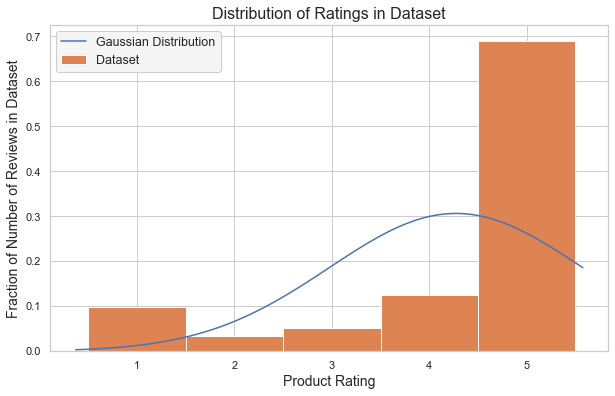

In [39]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(xs, norm.pdf(xs, mu, sigma), label='Gaussian Distribution')
plt.hist(rating_list, np.arange(6)+1, weights=np.ones(len(rating_list)) / len(rating_list), align='left', label='Dataset')
plt.title('Distribution of Ratings in Dataset', fontsize=16)
plt.ylabel('Fraction of Number of Reviews in Dataset', fontsize=14)
plt.xlabel('Product Rating', fontsize=14)
plt.legend(facecolor='whitesmoke', framealpha=1, fontsize=12.5)
plt.savefig('../Figures/1_Histogram.png', bbox_inches='tight')
plt.show()